# CanESM5 GMD paper Figure 15 
## Sea surface temperature and salinity anomalies

### history
2019-04-04 NCS basic look


In [1]:
import xarray as xr
import numpy as np
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import iris
import iris.analysis.cartography
import iris.quickplot as qplt
import iris.plot as iplt
from cdo import *
import modules.basic_stats as bst
import modules.plotting_module as pltm
import sqlite3
import datetime

cdo = Cdo()
cdo.setCdo('/home/ords/crd/ccrn/scrd104/miniconda3/bin/cdo')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#constants
%store -r start
%store -r end
%store -r fig_15_zos_start
%store -r fig_15_zos_end
%store -r zeroC_in_K

zos_startdate = datetime.datetime.strptime(fig_15_zos_start,'%Y-%m-%d')
zos_enddate = datetime.datetime.strptime(fig_15_zos_end,'%Y-%m-%d')

In [3]:
#mask sos and save before remapping - masking is not done in original CanESM2 file
mask_sos_and_create_netcdf = False

if mask_sos_and_create_netcdf:
    sftof = xr.open_dataset('input_data/CanESM2_large_ensemble/piControl/fx/ocean/sftof/r0i0p0/sftof_fx_CanESM2_piControl_r0i0p0.nc')
    #using small ensemble sos data which only goes to 2005 here, because of issues with slightly diff sftof and sos grids for other datasets. Maybe need to resolve this in the future. 
    #from Andrew:long story short, the CanSISE is wrong because it's when they changed over diagnostics. The information 'should' be correct by index. But the absolutely correct `sftof` is at: 
    #`/space/hall1/sitestore/eccc/crd/cetus3_data/CCCma_Output/CMIP5/output/CCCma/CanESM2/piControl/fx/ocean/sftof/r0i0p0/sftof_fx_CanESM2_piControl_r0i0p0.nc`
    sos = xr.open_dataset('input_data/CanESM2_large_ensemble/historical/mon/ocean/sos/r1i1p1/sos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc')

    merged = xr.merge([sos,sftof])
    sos_masked = merged.where(merged.sftof>=100).drop('time_bnds') #time_bnds is preventing conversion to netcdf and is not necessary here
    sos_masked.to_netcdf(path='input_data/processed_data/masked_sos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc')

    fig, ax = plt.subplots(1, 1, figsize=(6,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
    cm = ax.pcolormesh(merged.lon, merged.lat, merged.sos.mean(dim='time'), transform=ccrs.PlateCarree())
    pltm.add_cbar('right', fig, ax, cm, extend='both')



In [4]:
#remapping
runCDO = False

if runCDO:
    #tos
    CanESM5_tos = 'tos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'    
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Omon/tos/gn/v20190429/', CanESM5_tos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_tos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    CanESM2_tos = 'tos_Omon_CanESM2_historical-r1_r1i1p1_195001-202012.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble//historical-r1/mon/ocean/tos/r1i1p1/', CanESM2_tos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_tos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    
    #sos
    CanESM5_sos = 'sos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'    
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Omon/sos/gn/v20190429/', CanESM5_sos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_sos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    CanESM2_sos = 'masked_sos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc'    
    ifile = os.path.join('processed_data/', CanESM2_sos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_sos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    
    #zos
    CanESM5_zos = 'zos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc'    
    ifile = os.path.join('input_data/CanESM5_cmip_dir/historical/r1i1p1f1/Omon/zos/gn/v20190429/', CanESM5_zos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM5_zos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)
    
    #using se zos data, no large ensemble files for zos
    CanESM2_zos = 'zos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc'    
    ifile = os.path.join('input_data/CanESM2_large_ensemble//historical/mon/ocean/zos/r1i1p1/', CanESM2_zos)
    ofile = 'input_data/processed_data/remap-woa09_' + CanESM2_zos
    cdo.remapbil('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', input=ifile, output=ofile)


In [5]:
#get data and calculate means and anomalies for tos and sos

tos = xr.open_dataset('input_data/processed_data/remap-woa09_tos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['tos'].sel(time=slice(start, end))
sos = xr.open_dataset('input_data/processed_data/remap-woa09_sos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc')['sos'].sel(time=slice(start, end))

tos_obs = xr.open_dataset('input_data/obs/woa/woa09/uncs_woa09_ann_tpot.nc', decode_times=False)['tpot'].squeeze()
sos_obs = xr.open_dataset('input_data/obs/woa/woa09/salinity_annual_1deg.nc', decode_times=False)['s_an'].squeeze()

tos_mean = tos.mean(dim='time')
sos_mean = sos.mean(dim='time')

tos_obs_sfc = tos_obs.sel(depth=0)
tos_anom = tos_mean - tos_obs_sfc

sos_obs_sfc =  sos_obs.sel(depth=0)
sos_anom = sos_mean - sos_obs_sfc.squeeze()

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [6]:
#get data and calculate means and anomalies for zos
# Loading `zos` in iris, because it makes it easy to compute the weighted global mean, which should be removed from each.

zos_obs = iris.load_cube('input_data/processed_data/remap-woa09_timmean_dt_ref_madt_1992_2013.nc')
zos_obs.coord('latitude').guess_bounds()
zos_obs.coord('longitude').guess_bounds()
zos_obs_grid_areas = iris.analysis.cartography.area_weights(zos_obs)
zos_obs = zos_obs.collapsed(['time'], iris.analysis.MEAN) - zos_obs.collapsed(['latitude', 'longitude', 'time'], iris.analysis.MEAN,  weights=zos_obs_grid_areas)

date_range=iris.Constraint(time=lambda cell: zos_startdate.year <= cell.point.year <= zos_enddate.year) #restrict to same timespan as obs
zos = iris.load_cube('input_data/processed_data/remap-woa09_zos_Omon_CanESM5_historical_r1i1p1f1_gn_185001-201412.nc',date_range)
zos.coord('latitude').guess_bounds()
zos.coord('longitude').guess_bounds()
zos_grid_areas = iris.analysis.cartography.area_weights(zos)
zos_mean = zos.collapsed(['latitude', 'longitude', 'time'], iris.analysis.MEAN,  weights=zos_grid_areas)
zos = zos.collapsed(['time'], iris.analysis.MEAN)*100 - zos_mean*100

zos.units='cm'
zos_obs.units='cm'

zos_anom = zos - zos_obs

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'zos'
  warnings.warn(message % (variable_name, nc_var_name))
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


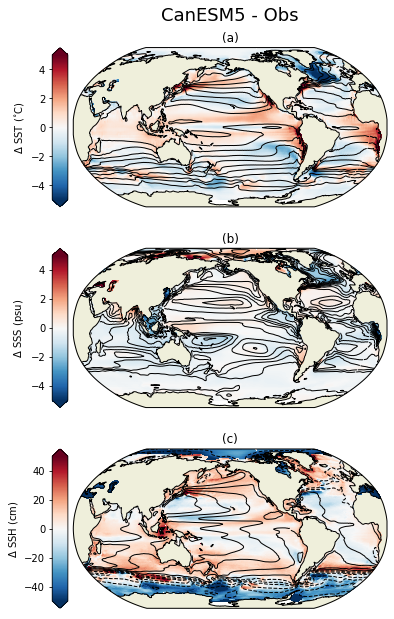

In [7]:
#plotting - anomalies only

fig, (axt, axm, axb) = plt.subplots(3, 1, figsize=(6,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
fig.subplots_adjust(wspace=0.1, hspace=-0.2)
title_fontsize = 18

cmap2=plt.cm.RdBu_r
cb_tos = axt.pcolormesh(tos.lon, tos.lat,tos_anom, cmap=cmap2, vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, axt, cb_tos, extend='both', label = r'$\Delta$ SST ($^{\circ}$C)')
cs=axt.contour(tos.lon, tos.lat, tos_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axt.set_title('(a)')#' SST anomaly')
axt.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)


cb_sos = axm.pcolormesh(sos.lon, sos.lat,sos_anom, cmap='RdBu_r', vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, axm, cb_sos, extend='both', label = r'$\Delta$ SSS (psu)')
css=axm.contour(sos.lon, sos.lat, sos_mean, np.arange(30,40,0.5), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axm.clabel(css, inline=1, fontsize=10)
axm.set_title('(b)')# SSS anomaly')

plt.sca(axb)
cb_zos = iplt.pcolormesh(zos_anom, cmap='RdBu_r', vmin=-50, vmax=50, rasterized=True)
iplt.contour(zos, np.arange(-0,200,20), colors='k', linewidths=1)
iplt.contour(zos, np.arange(-210,-60,50), colors='k', linewidths=1)
iplt.contour(zos, np.arange(-60,0,20), colors='k', linewidths=1)
pltm.add_cbar('left', fig, axb, cb_zos, extend='both', label=r'$\Delta$ SSH (cm)')
#css=axm.contour(zos.lon, zos.lat, zos_mean, np.arange(30,40,0.5), colors='k', transform=ccrs.PlateCarree())
axb.set_title('(c)')# SSH anomaly')


#cmap.set_bad([0.5,0.5,0.5])

for ax in [axt, axm, axb]:
    ax.coastlines()
    #ax.add_feature(ccrs.feature.LAND, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.LAND)

fig.savefig('plots/fig-X15_tos-sos.png', bbox_inches='tight')

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


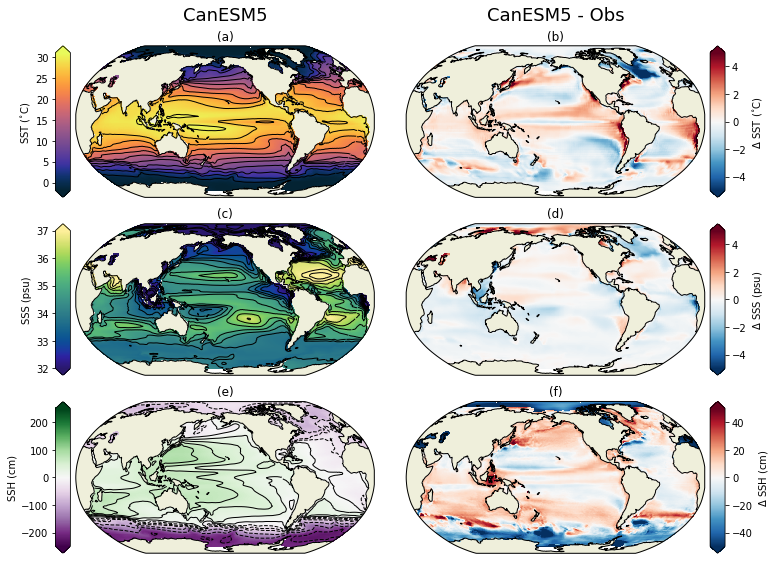

In [11]:
#plotting - CanESM5 means & anomalies

fig, ((axtl, axt), (axml, axm), (axbl, axb)) = plt.subplots(3, 2, figsize=(12,12), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=200)))
fig.subplots_adjust(wspace=0.1, hspace=-0.4)
title_fontsize = 18

cmap2=plt.cm.RdBu_r
cb_tos = axtl.pcolormesh(tos.lon, tos.lat,tos_mean, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('left', fig, axtl, cb_tos, extend='both', label =r'SST ($^{\circ}$C)')
axtl.text(0.5, 1.2, 'CanESM5', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axtl.transAxes)
#plt.colorbar(cb_tos, ax=axtl, use_gridspec=True, extend='both', label =r'SST ($^{\circ}$C)', orientation='vertical')
cs=axtl.contour(tos.lon, tos.lat, tos_mean, 10, colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axtl.set_title('(a)')#' SST')

cb_sos = axml.pcolormesh(sos.lon, sos.lat,sos_mean, cmap=cmocean.cm.haline, transform=ccrs.PlateCarree(), vmin=32,vmax=37, rasterized=True)
pltm.add_cbar('left', fig, axml, cb_sos, extend='both', label=r'SSS (psu)')
css=axml.contour(sos.lon, sos.lat, sos_mean, np.arange(30,40,0.5), colors='k', transform=ccrs.PlateCarree(), linewidths=1)
#axm.clabel(css, inline=1, fontsize=10)
#axt.clabel(cs, inline=1, fontsize=10)
axml.set_title('(c)')#' SSS')

plt.sca(axbl)
cb_zos = iplt.pcolormesh(zos, vmin=-250, vmax=250, cmap='PRGn', rasterized=True)
#cb_zos = iplt.contour(zos_anom, colors='k', linewidths=1)
iplt.contour(zos, np.arange(-0,200,20), colors='k', linewidths=1)
iplt.contour(zos, np.arange(-210,-60,50), colors='k', linewidths=1)
iplt.contour(zos, np.arange(-60,0,20), colors='k', linewidths=1)
#axt.clabel(cs, inline=1, fontsize=10)
axbl.set_title('(e)')#' SSH')
pltm.add_cbar('left', fig, axbl, cb_zos, extend='both', label=r'SSH (cm)')

# Anomalies
cb_tos = axt.pcolormesh(tos.lon, tos.lat,tos_anom, cmap=cmap2, vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('right', fig, axt, cb_tos, extend='both', label=r'$\Delta$ SST ($^{\circ}$C)')
axt.set_title('(b)')#' SST anomaly')
axt.text(0.5, 1.2, 'CanESM5 - Obs', horizontalalignment='center', verticalalignment='center', fontsize=title_fontsize, transform=axt.transAxes)

cb_sos = axm.pcolormesh(sos.lon, sos.lat,sos_anom, cmap='RdBu_r', vmin=-5, vmax=5, transform=ccrs.PlateCarree(), rasterized=True)
pltm.add_cbar('right', fig, axm, cb_sos, extend='both', label=r'$\Delta$ SSS (psu)')
axm.set_title('(d)')#' SSS anomaly')

plt.sca(axb)
cb_zos = iplt.pcolormesh(zos_anom, cmap='RdBu_r', vmin=-50, vmax=50, rasterized=True)
pltm.add_cbar('right', fig, axb, cb_zos, extend='both', label=r'$\Delta$ SSH (cm)')
axb.set_title('(f)')#' SSH anomaly')


for ax in [axt, axm, axb, axtl, axml, axbl]:
    ax.coastlines()
    ax.add_feature(cfeature.LAND)

fig.savefig('plots/fig-15_tos-sos-v2.png', bbox_inches='tight')
fig.savefig('plots/fig-15_tos-sos-v2.pdf', bbox_inches='tight')

In [9]:
#CanESM2 data sets for basic statistics

#CanESM2 - so far just using r1 here 
tos_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_tos_Omon_CanESM2_historical-r1_r1i1p1_195001-202012.nc')['tos'].sel(time=slice(start, end)).mean(dim='time')-zeroC_in_K
sos_CanESM2 = xr.open_dataset('input_data/processed_data/remap-woa09_masked_sos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc')['sos'].sel(time=slice(start, end)).mean(dim='time')

#get data and calculate means and anomalies for zos
# Loading `zos` in iris, because it makes it easy to compute the weighted global mean, which should be removed from each.
date_range=iris.Constraint(time=lambda cell: zos_startdate.year <= cell.point.year <= zos_enddate.year) #restrict to same timespan as obs
zos_CanESM2 = iris.load_cube('input_data/processed_data/remap-woa09_zos_Omon_CanESM2_historical_r1i1p1_185001-200512.nc',date_range)
zos_CanESM2.coord('latitude').guess_bounds()
zos_CanESM2.coord('longitude').guess_bounds()
zos_grid_areas_CanESM2 = iris.analysis.cartography.area_weights(zos_CanESM2)
zos_mean_CanESM2 = zos_CanESM2.collapsed(['latitude', 'longitude', 'time'], iris.analysis.MEAN,  weights=zos_grid_areas_CanESM2)
zos_CanESM2 = zos_CanESM2.collapsed(['time'], iris.analysis.MEAN)*100 - zos_mean_CanESM2*100




/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:798: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'zos'
  warnings.warn(message % (variable_name, nc_var_name))
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [10]:
##### statistics - for global time means
xyzt ='TTFF'
av_dims = ['time'] #dimensions over which to average (time for global time means, time and lon for zonal means and sections, )
weight = xr.open_dataset('input_data/obs/woa/woa09_gridarea.nc')['cell_area']
calc_skill_score=False


#the following lists will be zipped for the stats calcs, so all info should be entered accordingly
model_names    = ['CanESM5','CanESM5','CanESM5','CanESM2','CanESM2','CanESM2']
model_datasets    = [tos_mean, sos_mean, xr.DataArray.from_iris(zos), tos_CanESM2, sos_CanESM2, xr.DataArray.from_iris(zos_CanESM2)]
model_fulldatasets = [None,None,None,None,None,None,]

obs_names    = ['woa09','woa09','AVISO','woa09','woa09','AVISO']
obs_datasets    = [tos_obs_sfc, sos_obs_sfc, xr.DataArray.from_iris(zos_obs), tos_obs_sfc, sos_obs_sfc, xr.DataArray.from_iris(zos_obs)]
obs_fulldatasets = [None,None,None,None,None,None,]

stats_names = ['tos_global_timemean','sos_global_timemean','zos_global_timemean','tos_global_timemean_CanESM2','sos_global_timemean_CanESM2','zos_global_timemean_CanESM2'] #names for json file
varslist = ['tos','sos','zos','tos','sos','zos']

bst.calc_stats_and_write(obs_datasets, obs_fulldatasets, obs_names, model_datasets, model_fulldatasets, model_names, stats_names, varslist, weight, xyzt, av_dims, start, end, calc_skill_score=calc_skill_score)

tos CanESM5 woa09
{'bias': 0.08196033461730431, 'RMSE': 1.2004364235558687, 'CRMSE': 1.1976352143447375, 'corrcoeff': 0.993433202486319, 'model_std': 10.160108086988327, 'obs_std': 9.805240259203156, 'S_bias': None, 'S_rmse': None, 'S_dist': 0.9954578590420974}
sos CanESM5 woa09
{'bias': -0.18098574760594535, 'RMSE': 0.8310935296583407, 'CRMSE': 0.8111477134625017, 'corrcoeff': 0.9008102020798495, 'model_std': 1.7403199352762988, 'obs_std': 1.862526720990856, 'S_bias': None, 'S_rmse': None, 'S_dist': 0.9460412585095412}
zos CanESM5 AVISO
{'bias': 2.1857361592062694, 'RMSE': 14.585518975331766, 'CRMSE': 14.420815553293135, 'corrcoeff': 0.9824804692528164, 'model_std': 70.53609224478659, 'obs_std': 63.371103119865666, 'S_bias': None, 'S_rmse': None, 'S_dist': 0.979953224147011}
tos CanESM2 woa09
{'bias': -0.07941929065554248, 'RMSE': 1.106243444391796, 'CRMSE': 1.1033889316702516, 'corrcoeff': 0.9944324482752757, 'model_std': 10.131290424355607, 'obs_std': 9.796122583954217, 'S_bias': No